Pyber Ride Sharing Report:

* Rural cities have the highest average fares and the fewest number of rides and drivers. Urban cities had the lowest average fares and the highest number of rides and drivers. However, rural cities had a greater variation in average fare, while urban cities had a greater variation in total number of rides and drivers per city.

* 62.7 percent of total fares, 68.4 percent of total rides, and 80.9 percent of total drivers come from urban cities, thus urban cities are the greatest contributor in terms of human resources, demand generation, and revenue.

* Without considering city type, the data suggests a negative relationship between average fare and total number of rides per city, however, the added context of city type reveals that external factors like accessibility may also be in play. 


In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
total_data = pd.merge(ride_df,city_df, on="city")

# Display the data table for preview
total_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

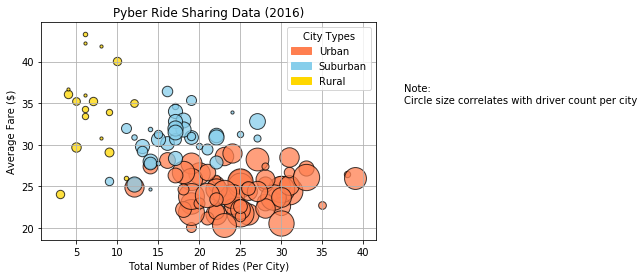

In [16]:
# Obtain the x and y coordinates for each of the three city types

#loop through dataframe and append to dictionaries
city_dict = {}
detail_dict = {}

for i in range(0,len(total_data['city'])):
    current_row = total_data.iloc[i]
    my_type = current_row['type']
    if current_row['city'] in city_dict:
        city_dict[current_row['city']].append(current_row['fare'])
    else:
        city_dict[current_row['city']] = [current_row['fare']]
        detail_dict[current_row['city']] = (current_row['driver_count'], current_row['type'])
#loop through dictionary and plot point
fig,ax = plt.subplots()
for city in city_dict:
    x = len(city_dict[city])
    y = np.array(city_dict[city]).mean()
    if (detail_dict[city])[1] == 'Urban':
        c = 'coral'
        label = 'Urban'
    if (detail_dict[city])[1] == 'Suburban':
        c = 'skyblue'
        label = 'Suburban'
    if (detail_dict[city])[1] == 'Rural':
        c = 'gold'
        label = 'Rural'
    s = detail_dict[city][0]
    ax.scatter(x, y, label = label, s = 10*s, c = c, edgecolors = 'black', alpha=0.75 )

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)");
plt.xlabel("Total Number of Rides (Per City)");
plt.ylabel("Average Fare ($)");
# Create a legend
#plt.legend(('Rural', 'Suburban', 'Urban'), ('gold','skyblue' ,'coral'));
from matplotlib.patches import Patch
legend_elements=[Patch(label='Urban',color='coral'),Patch(label='Suburban',color='skyblue'),Patch(label='Rural',color='gold')];
ax.legend(handles=legend_elements, loc='upper right', title = 'City Types');

# Incorporate a text label regarding circle size
plt.text(45,35,'''Note: 
Circle size correlates with driver count per city''', horizontalalignment='left')
# Save Figure
plt.savefig("Pyber_RideSharing_Data.png")

## Total Fares by City Type

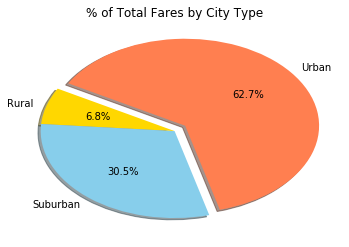

In [184]:
# Calculate Type Percents
total_fare = 0
for city in city_dict:
    for value in city_dict[city]:
        total_fare += value
total_fare = round(total_fare)


urban_fare = 0
rural_fare = 0
suburban_fare = 0

for city in city_dict:
    if (detail_dict[city])[1] == 'Urban':
        for value in city_dict[city]:
            urban_fare += value
    if (detail_dict[city])[1] == 'Rural':
        for value in city_dict[city]:
            rural_fare += value
    if (detail_dict[city])[1] == 'Suburban':
        for value in city_dict[city]:
            suburban_fare += value

percent_urban_fare = (urban_fare / total_fare)*100
percent_rural_fare = (rural_fare / total_fare)*100
percent_suburban_fare = (suburban_fare / total_fare)*100


# Build Pie Chart
city_types = ['Urban','Rural','Suburban']
explode = [0.1,0,0]
percent_fare = [percent_urban_fare, percent_rural_fare, percent_suburban_fare]
colors = ['coral','gold','skyblue']

fig,ax = plt.subplots();
plt.pie(percent_fare, explode=explode, labels=city_types, colors=colors,
        autopct="%0.1f%%", shadow=True, startangle=285);
plt.axis("off");
plt.title("% of Total Fares by City Type");
ax.set_aspect(aspect = 'auto');

# Save Figure
plt.savefig("TotalFares_CityType.png")
plt.show()

## Total Rides by City Type

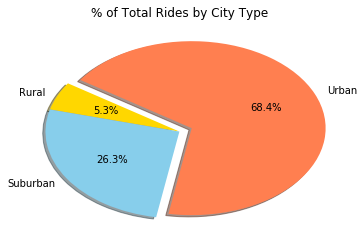

In [190]:
# Calculate Ride Percents

total_rides = 0
for city in city_dict:
    total_rides += len(city_dict[city])
total_rides

urban_rides = 0
rural_rides = 0
suburban_rides = 0

for city in city_dict:
    if (detail_dict[city])[1] == 'Urban':
        urban_rides += len(city_dict[city])
    if (detail_dict[city])[1] == 'Rural':
        rural_rides += len(city_dict[city])
    if (detail_dict[city])[1] == 'Suburban':
        suburban_rides += len(city_dict[city])
        
percent_urban_rides = (urban_rides / total_rides)*100
percent_rural_rides = (rural_rides / total_rides)*100
percent_suburban_rides = (suburban_rides / total_rides)*100

# Build Pie Chart

city_types = ['Urban','Rural','Suburban']
explode = [0.1,0,0]
percent_fare = [percent_urban_rides, percent_rural_rides, percent_suburban_rides]
colors = ['coral','gold','skyblue']

fig,ax = plt.subplots();
plt.pie(percent_fare, explode=explode, labels=city_types, colors=colors,
        autopct="%0.1f%%", shadow=True, startangle=260);
ax.set_aspect(aspect = 'auto');
plt.title("% of Total Rides by City Type");
# Save Figure
plt.savefig("TotalRides_CityType.png")
plt.show()

## Total Drivers by City Type

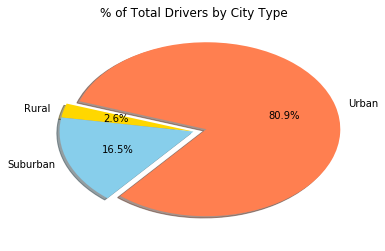

In [182]:
# Calculate Driver Percents

total_drivers = 0
for city in detail_dict:
    total_drivers += detail_dict[city][0]
total_drivers

urban_drivers = 0
rural_drivers = 0
suburban_drivers = 0

for city in city_dict:
    if (detail_dict[city])[1] == 'Urban':
        urban_drivers += details_dict[city][0]
    if (detail_dict[city])[1] == 'Rural':
        rural_drivers += details_dict[city][0]
    if (detail_dict[city])[1] == 'Suburban':
        suburban_drivers += details_dict[city][0]

percent_urban_drivers = (urban_drivers / total_drivers)*100
percent_rural_drivers = (rural_drivers / total_drivers)*100
percent_suburban_drivers = (suburban_drivers / total_drivers)*100

# Build Pie Charts
city_types = ['Urban','Rural','Suburban']
explode = [0.1,0,0]
percent_fare = [percent_urban_drivers, percent_rural_drivers, percent_suburban_drivers]
colors = ['coral','gold','skyblue']

fig,ax = plt.subplots();
plt.pie(percent_fare, explode=explode, labels=city_types, colors=colors,autopct="%0.1f%%", shadow=True, startangle=230);

ax.set_aspect(aspect = 'auto');
plt.title("% of Total Drivers by City Type");

# Save Figure
plt.savefig("TotalDrivers_CityType.png")
plt.show()
